In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Authentication
consumerKey = "VCXi57kKSV9XknYF6URbKsZLX"
consumerSecret = "RLRuh0KUVgGjGjGczmRIC66HbyUPrM6ltM9pVGXigI0Ub15qyd"
accessToken = "722625417081802756-Ma1ZvIpwrIZQK4K83umzgMSHQhg5bVr"
accessTokenSecret = "tjuHWYt23cLjpqJIo3ewTMKV9zmcPiKFGXatmSdd5ksBO"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword, lang="en").items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: MobileLegendsOL
Please enter how many tweets to analyze: 1000


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  854
positive number:  434
negative number:  118
neutral number:  302


In [5]:
tweet_list

,0
0,RT @MobileLegendsOL: Don't underestimate me! 😤...
1,@MobileLegendsOL Moonton pls make Claude free ...
2,RT @MobileLegendsOL: When you encounter the st...
3,RT @MobileLegendsOL: Don't underestimate me! 😤...
4,RT @MobileLegendsOL: - As the young duchess of...
...,...
849,RT @MobileLegendsOL: June Starlight Skin - Tig...
850,RT @AnonSC_: @MobileLegendsOL 🌟⚡️🌟⚡️🌟⚡️🌟⚡️🌟⚡️🌟...
851,@MobileLegendsOL JULIAN IS AMAZING HERO ❤️
852,RT @MobileLegendsOL: 📣Patch 1.6.84 Advanced Se...


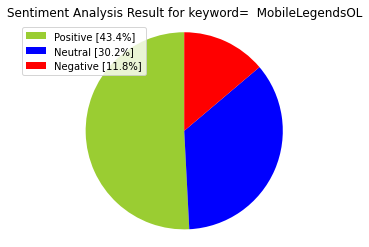

In [6]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [8]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @MobileLegendsOL: Don't underestimate me! 😤...,RT @MobileLegendsOL: Don't underestimate me! 😤...
1,@MobileLegendsOL Moonton pls make Claude free ...,@MobileLegendsOL Moonton pls make Claude free ...
2,RT @MobileLegendsOL: When you encounter the st...,RT @MobileLegendsOL: When you encounter the st...
4,RT @MobileLegendsOL: - As the young duchess of...,RT @MobileLegendsOL: - As the young duchess of...
6,When you encounter the strongest Raven Julian ...,When you encounter the strongest Raven Julian ...
...,...,...
847,@MobileLegendsOL franco:hey chang’e i found so...,@MobileLegendsOL franco:hey chang’e i found so...
848,@MobileLegendsOL Skills effects are osm,@MobileLegendsOL Skills effects are osm
850,RT @AnonSC_: @MobileLegendsOL 🌟⚡️🌟⚡️🌟⚡️🌟⚡️🌟⚡️🌟...,RT @AnonSC_: @MobileLegendsOL 🌟⚡️🌟⚡️🌟⚡️🌟⚡️🌟⚡️🌟...
851,@MobileLegendsOL JULIAN IS AMAZING HERO ❤️,@MobileLegendsOL JULIAN IS AMAZING HERO ❤️


In [9]:
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()

In [10]:
#Menghapus karakter HTML
tw_list['text'].replace({'r"\&\#[0-9]+\;"':''},regex=True,inplace=True)

In [11]:
#Mengubah semua text menjadi huruf kecil
tw_list['text'] = tw_list['text'].str.lower()

In [12]:
#Menghapus tanda baca
tw_list['text'].replace({'[^\w\s]':''},regex=True,inplace=True)

In [13]:
#Menghapus angka
tw_list['text'].replace({'\d+':''},regex=True,inplace=True)

In [14]:
#Menghapus tanda jeda baris
tw_list['text'].replace({'\n':'','\r':'',"\'":""},regex=True,inplace=True)

In [15]:
#Menghapus spasi putih yang tidak perlu
tw_list['text'].replace({'r"[\s]+"':''},regex=True,inplace=True)

In [16]:
#Menghapus aksen
from unicodedata import normalize
tw_list['text'] = tw_list['text'].apply(lambda text: normalize("NFKD", str(text)).encode("ascii", "ignore").decode("utf-8", "ignore"))

In [17]:
#Menghapus STOPWORDS
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
tw_list['text'] = tw_list['text'].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))

In [18]:
tw_list

,0,text
0,RT @MobileLegendsOL: Don't underestimate me! 😤...,underestimate mgl creator mglfanart ...
1,@MobileLegendsOL Moonton pls make Claude free ...,moonton pls make claude free want test real ...
2,RT @MobileLegendsOL: When you encounter the st...,encounter strongest raven julian battlefield ...
4,RT @MobileLegendsOL: - As the young duchess of...,young duchess necrokeep shimmer hope shini...
6,When you encounter the strongest Raven Julian ...,encounter strongest raven julian battlefield ...
...,...,...
847,@MobileLegendsOL franco:hey chang’e i found so...,franco hey chang e found someone
848,@MobileLegendsOL Skills effects are osm,skills effects osm
850,RT @AnonSC_: @MobileLegendsOL 🌟⚡️🌟⚡️🌟⚡️🌟⚡️🌟⚡️🌟...,sil...
851,@MobileLegendsOL JULIAN IS AMAZING HERO ❤️,julian amazing hero


In [19]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MobileLegendsOL: Don't underestimate me! 😤...,underestimate mgl creator mglfanart ...,0.000000,0.000000,negative,0.268,0.732,0.000,-0.2960
1,@MobileLegendsOL Moonton pls make Claude free ...,moonton pls make claude free want test real ...,0.300000,0.550000,positive,0.000,0.504,0.496,0.5994
2,RT @MobileLegendsOL: When you encounter the st...,encounter strongest raven julian battlefield ...,0.000000,0.000000,negative,0.344,0.464,0.192,-0.3182
4,RT @MobileLegendsOL: - As the young duchess of...,young duchess necrokeep shimmer hope shini...,0.100000,0.400000,positive,0.183,0.550,0.266,0.2263
6,When you encounter the strongest Raven Julian ...,encounter strongest raven julian battlefield ...,0.000000,0.000000,negative,0.344,0.464,0.192,-0.3182
7,i loved playing the new hero. (doesn't mean i ...,loved playing new hero mean liked hero st ...,0.324773,0.668409,positive,0.000,0.273,0.727,0.9559
9,RT @MobileLegendsOL: Haven't got the Exchange ...,got exchange token julian worry last member...,0.200000,0.233333,negative,0.266,0.734,0.000,-0.4404
12,"@MobileLegendsOL Faramis, Rubby Lancelot ?",faramis rubby lancelot,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
13,@MobileLegendsOL Freee skin,freee skin,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
14,@skycerkey @MobileLegendsOL Why would I lie ? ...,would lie seriously,-0.333333,0.666667,negative,0.459,0.541,0.000,-0.1779


In [20]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [21]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [22]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,280,49.04
neutral,189,33.10
negative,102,17.86


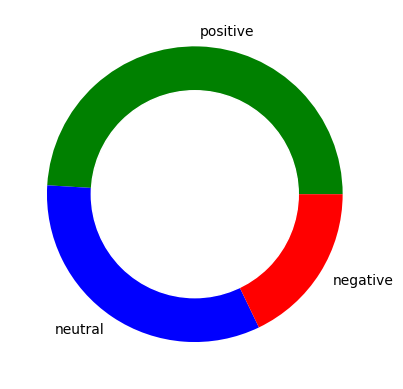

In [23]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [24]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


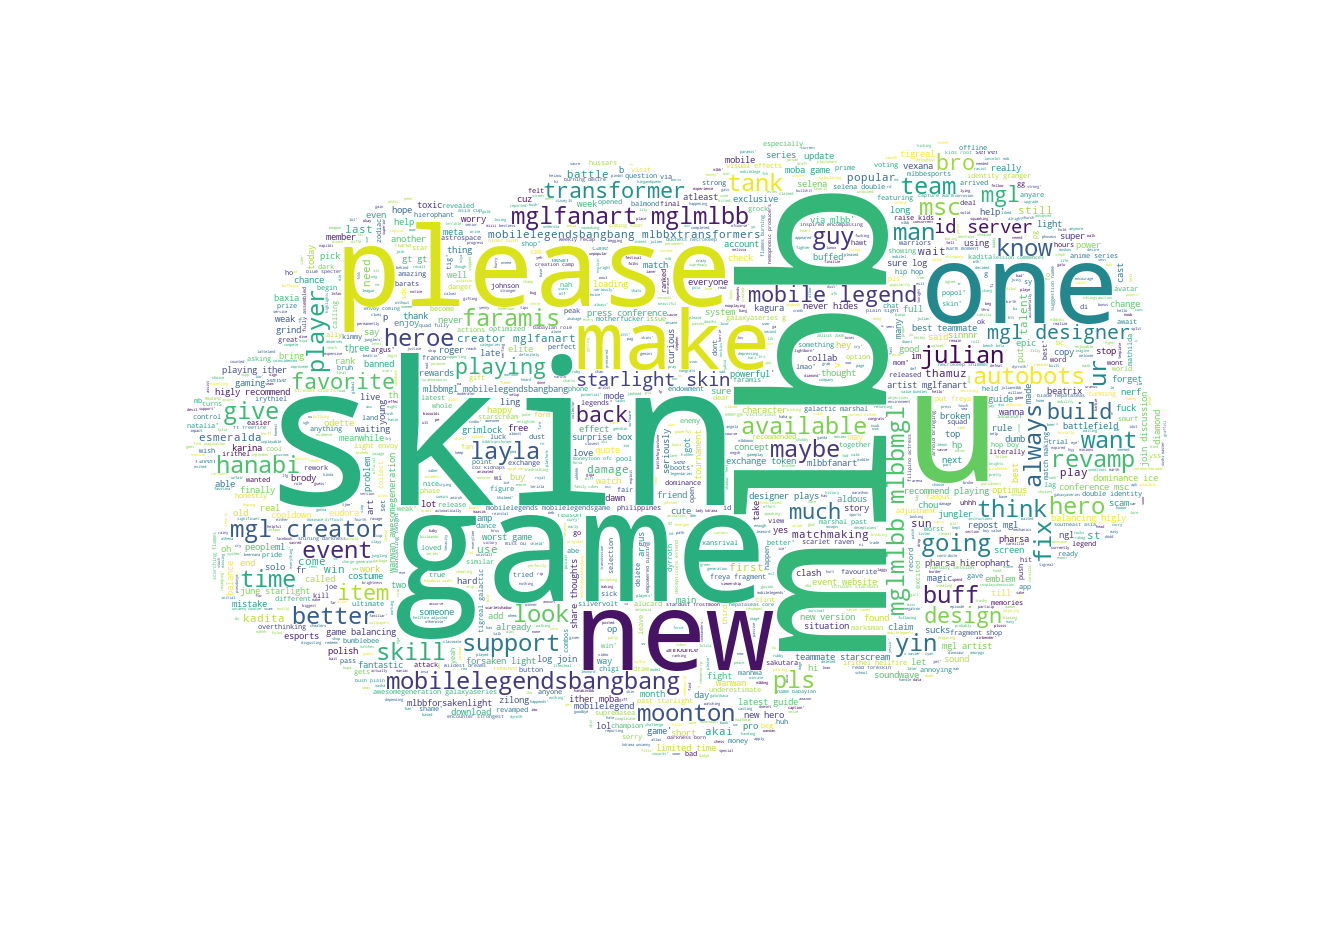

In [25]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


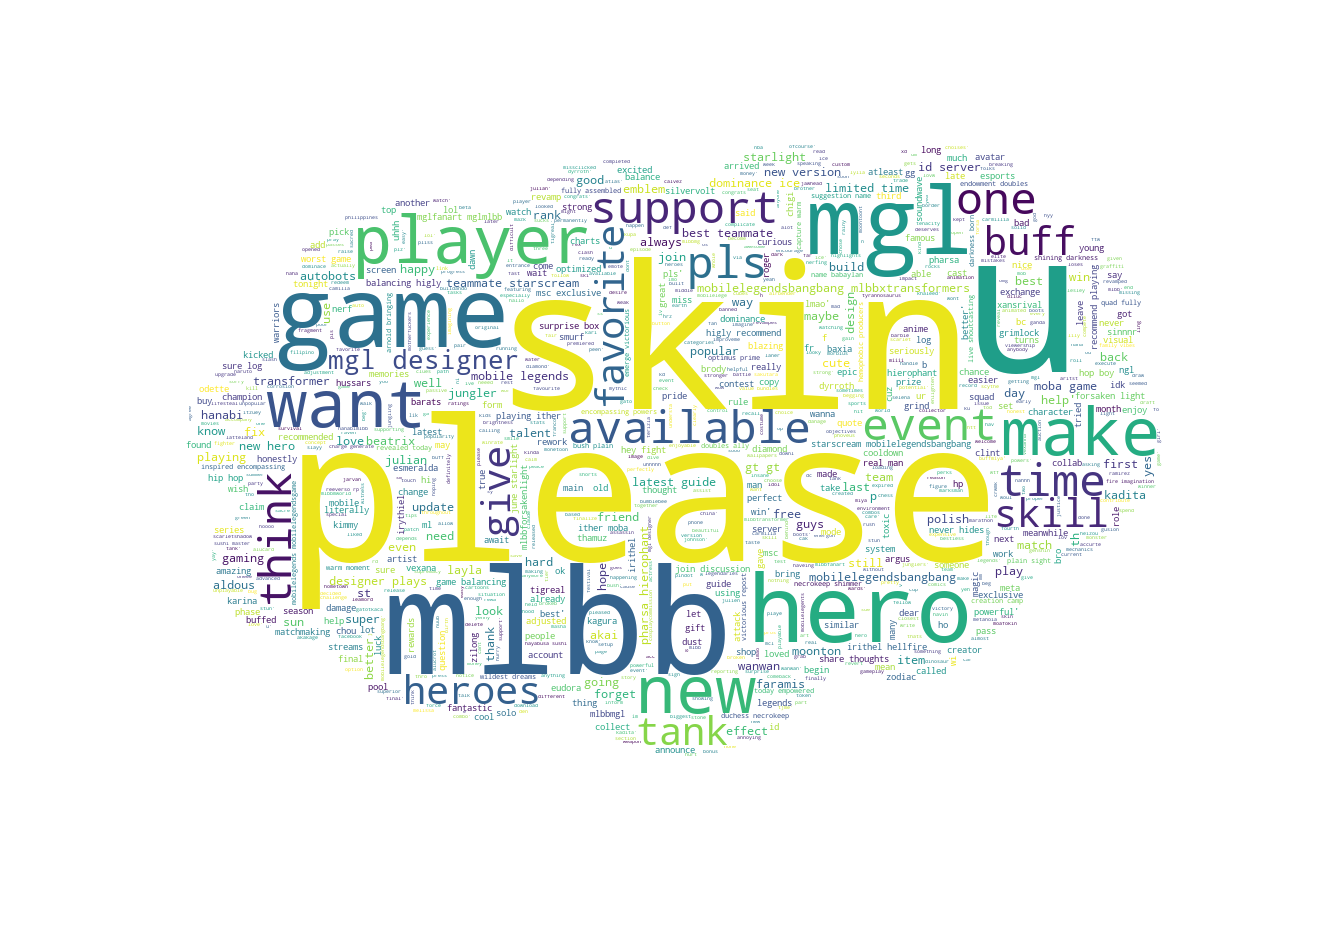

In [26]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


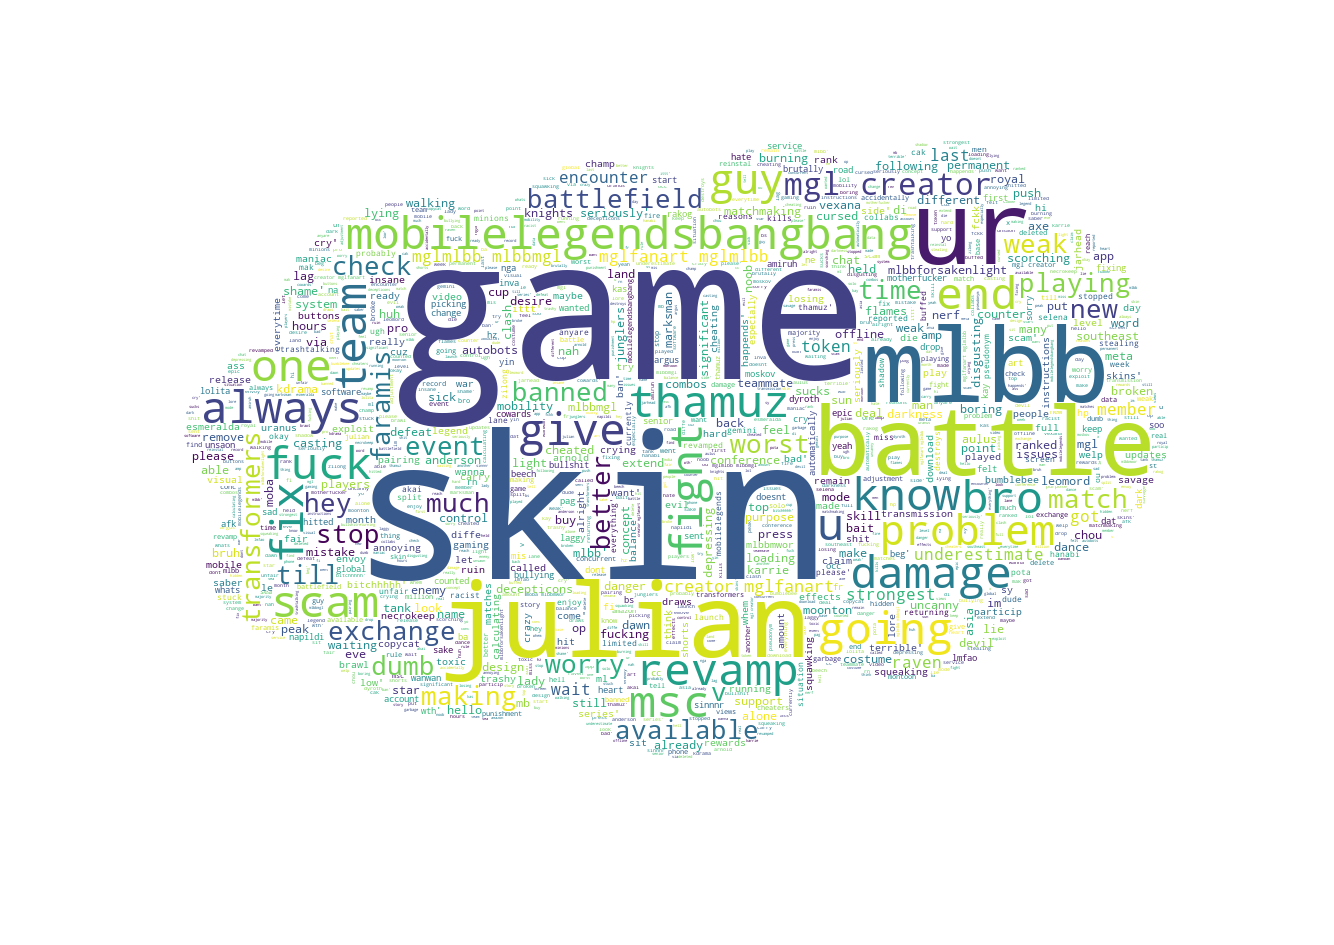

In [27]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


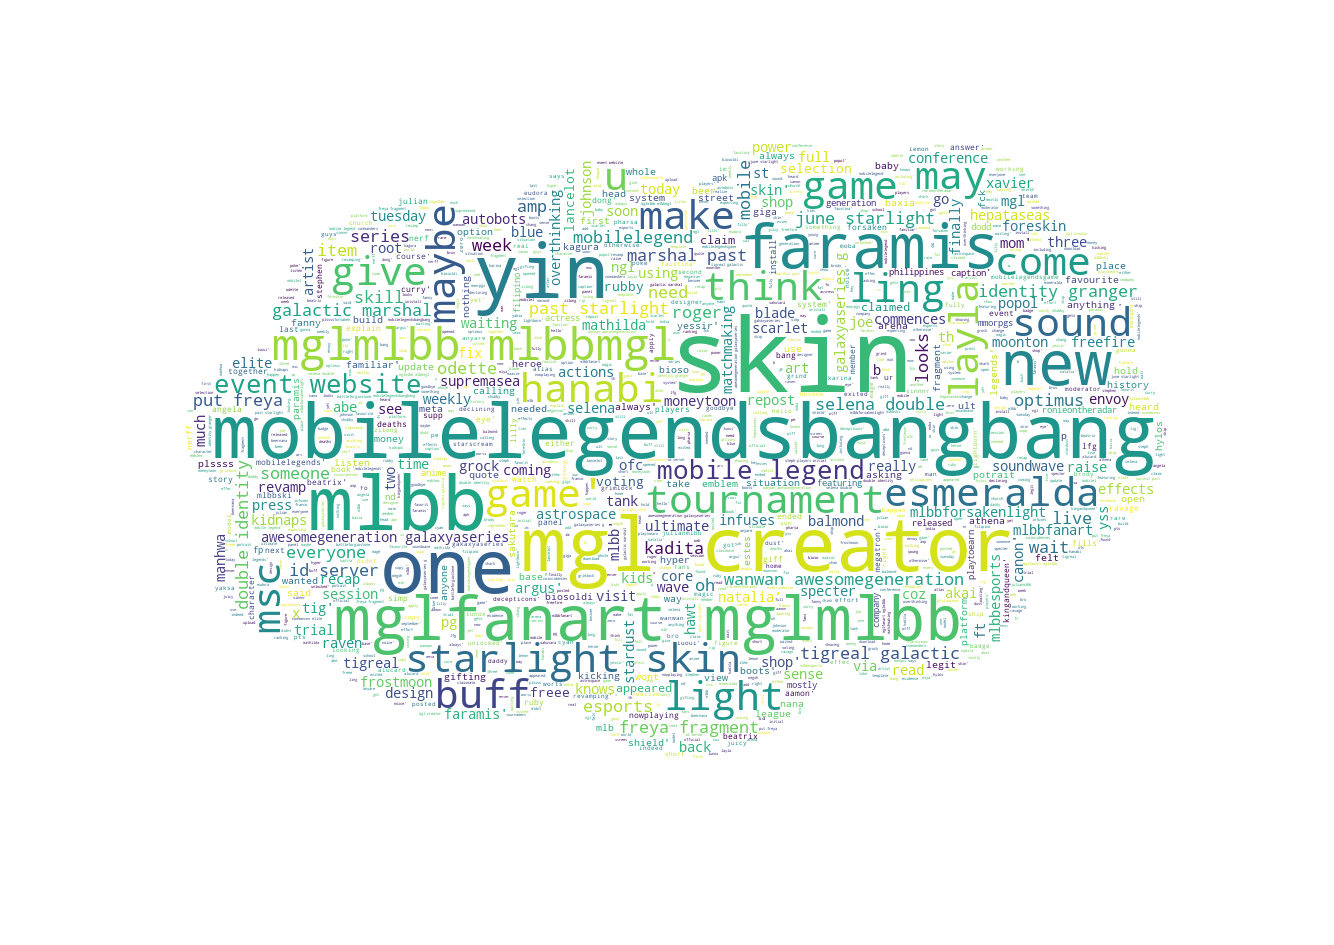

In [28]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [29]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [30]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,51.66
neutral,36.08
positive,55.50


In [31]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,7.24
neutral,4.45
positive,7.53


In [32]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [33]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [34]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [35]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [36]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [37]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @MobileLegendsOL: Don't underestimate me! 😤...,underestimate mgl creator mglfanart ...,0.0,0.00,negative,0.268,0.732,0.000,-0.2960,88,7,underestimate mgl creator mglfanart ...,"[, underestimate, mgl, creator, mglfanart, mgl...","[, underestimate, mgl, creator, mglfanart, mgl...","[, underestim, mgl, creator, mglfanart, mglmlb..."
1,@MobileLegendsOL Moonton pls make Claude free ...,moonton pls make claude free want test real ...,0.3,0.55,positive,0.000,0.504,0.496,0.5994,55,9,moonton pls make claude free want test real ...,"[, moonton, pls, make, claude, free, want, tes...","[, moonton, pls, make, claude, free, want, tes...","[, moonton, pl, make, claud, free, want, test,..."
2,RT @MobileLegendsOL: When you encounter the st...,encounter strongest raven julian battlefield ...,0.0,0.00,negative,0.344,0.464,0.192,-0.3182,73,10,encounter strongest raven julian battlefield ...,"[, encounter, strongest, raven, julian, battle...","[, encounter, strongest, raven, julian, battle...","[, encount, strongest, raven, julian, battlefi..."
4,RT @MobileLegendsOL: - As the young duchess of...,young duchess necrokeep shimmer hope shini...,0.1,0.40,positive,0.183,0.550,0.266,0.2263,68,9,young duchess necrokeep shimmer hope shini...,"[, young, duchess, necrokeep, shimmer, hope, s...","[, young, duchess, necrokeep, shimmer, hope, s...","[, young, duchess, necrokeep, shimmer, hope, s..."
6,When you encounter the strongest Raven Julian ...,encounter strongest raven julian battlefield ...,0.0,0.00,negative,0.344,0.464,0.192,-0.3182,74,10,encounter strongest raven julian battlefield ...,"[encounter, strongest, raven, julian, battlefi...","[encounter, strongest, raven, julian, battlefi...","[encount, strongest, raven, julian, battlefiel..."


In [38]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

571 Number of reviews has 1274 words


In [39]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aamon,abe,abl,acc,accident,accompani,account,accurt,action,...,yessir,yet,yin,yo,yoo,young,yss,zero,zilong,zodiac
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
skin,77
game,60
mlbb,41
mgl,39
new,35
mobilelegendsbangbang,33
hero,32
play,31
like,30
pleas,27


In [41]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [42]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('mglfanart mglmlbb', 14),
 ('mgl creator', 12),
 ('mglmlbb mlbbmgl', 11),
 ('mobile legends', 9),
 ('mgl designer', 8),
 ('id server', 8),
 ('mobilelegendsbangbang mlbbxtransformers', 8),
 ('creator mglfanart', 7),
 ('mlbbmgl mobilelegendsbangbang', 7),
 ('new hero', 7),
 ('best teammate', 7),
 ('june starlight', 6),
 ('designer plays', 6),
 ('new version', 6),
 ('limited time', 6),
 ('dominance ice', 5),
 ('starlight skin', 5),
 ('mobilelegendsbangbang mlbb', 5),
 ('gt gt', 5),
 ('teammate starscream', 5)]

In [43]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('mglfanart mglmlbb mlbbmgl', 11),
 ('mgl creator mglfanart', 7),
 ('creator mglfanart mglmlbb', 7),
 ('mglmlbb mlbbmgl mobilelegendsbangbang', 7),
 ('mgl designer plays', 6),
 ('june starlight skin', 5),
 ('best teammate starscream', 5),
 ('press conference msc', 4),
 ('mobilelegendsbangbang mlbb mgl', 4),
 ('gt gt gt', 4),
 ('teammate starscream mobilelegendsbangbang', 4),
 ('starscream mobilelegendsbangbang mlbbxtransformers', 4),
 ('mgl artist mglfanart', 4),
 ('artist mglfanart mglmlbb', 4),
 ('worst game balancing', 4),
 ('game balancing higly', 4),
 ('balancing higly recommend', 4),
 ('higly recommend playing', 4),
 ('recommend playing ither', 4),
 ('playing ither moba', 4)]